# Coursera - Finite-Difference Method - Acoustic Waves 1D

## Importing libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

## Define parameters

In [2]:
x_max = 10000       # Define physical domain (in m)
x_n_points = 10002  # Define number of points taken in space
dx = x_max/(x_n_points - 2)

t_n_points = 1002   # Define number of point taken in time domain
dt = 0.001          # Time steps taken
t_max = dt * (t_n_points - 2)   # Define time domain

f_0 = 25            # dominant frequency
t_0 = 4/float(f_0)  # source time shift
c_0 = 334           # speed of sound = 334 m/s
insert_src = int((x_n_points - 2)/2)
idisp = 5

## Plotting the source time function and fourier transform

<Figure size 1440x720 with 0 Axes>

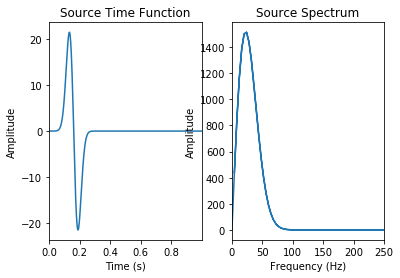

In [3]:
src_time = np.zeros(t_n_points - 2)
time = np.linspace(0, t_max, t_n_points - 2)
for i in range(0, t_n_points - 2):
    time[i] = i * dt

src_time = -2 * (time - t_0) * (f_0 ** 2) * (np.exp(-1.0 * (f_0 ** 2) * (time - t_0) ** 2))

# Plotting source time function and fourier transform

fig = plt.figure(figsize=(20, 10))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# ax1 = plt.subplot()
ax1.plot(time, src_time)    # plot source time function
ax1.set_title('Source Time Function')
ax1.set_xlim(time[0], time[t_n_points - 3])
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')


# ax2 = plt.subplot()
src_fourier = np.fft.fft(src_time)      # Taking fourier of the time function
freq = np.fft.fftfreq(src_fourier.size, d = dt / float(4))  # time domain to frequency domain
ax2.plot(np.abs(freq), np.abs(src_fourier))    # plot frequency and amplitude
ax2.set_xlim(0, 250)                    # only display frequency from 0 to 250 Hz
ax2.set_title('Source Spectrum')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')

plt.show()

## 1D Finite difference method

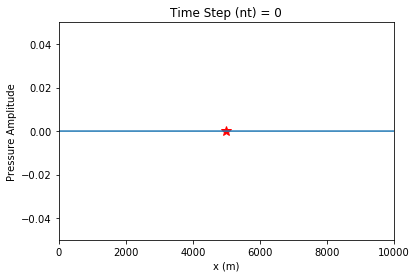

In [4]:
p_old = np.zeros(x_n_points - 2)       # Defining P[i-1]
p_new = np.zeros(x_n_points - 2)       # Defining P[i+1]
p = np.zeros(x_n_points - 2)           # Defining P[i] - current pressure at space point i
d2P = np.zeros(x_n_points - 2)         # Defining the second derivative of P

c = np.zeros(x_n_points - 2)           # C is a function of x
c = c + c_0                            # Assuming homogeneous medium

x = np.zeros(x_n_points - 2)           # Defining the position
for j in range(0, x_max, x_n_points - 2):
    x[j] = j * dx

plt.ion()                               # Needed for an animation
fig2 = plt.figure()
gs2 = gridspec.GridSpec(1,1,width_ratios=[1],hspace=0.3, wspace=0.3)
ax3 = plt.subplot(gs2[0])
leg1, = ax3.plot(insert_src, 0, 'r*', markersize=11)       # plot position of the source in snapshot
# leg2,= ax3.plot(ir, 0, 'k^', markersize=8)               # plot position of the receiver in snapshot
up31, = ax3.plot(p)                                        # plot pressure update each time step
ax3.set_xlim(0, x_max)
ax3.set_ylim(-1* np.max(p), np.max(p))
ax3.set_title('Time Step (nt) = 0')
ax3.set_xlabel('x (m)')
ax3.set_ylabel('Pressure Amplitude')
# ax3.legend((leg1, leg2), ('Source', 'Receiver'), loc='upper right', fontsize=10, numpoints=1)
plt.show()


In [5]:
for i_t in range(0, t_n_points - 2):                        # Defining for each time interval
    for i_x in range(1, x_n_points - 3):                    # Defining for each wave points
        d2P[i_x] = (p[i_x + 1] - 2 * p[i_x] + p[i_x - 1]) / float(dx ** 2)      # 2nd derivative of pressure

    p_new = 2 * p - p_old + c ** 2 * dt ** 2 * d2P          # Based on above found d2P, finding p[n+1]
    p_new[insert_src] = p_new[insert_src] + src_time[i_t]/float(dx*(dt ** 2))       # Inserting the source

    p_old,p = p,p_new                                       # Assigning p_old to p and p to p_new

    if(i_t % idisp) == 0:                                   # Plotting the animation
        ax3.set_title('Time Step (nt) = %d' % i_t)
        ax3.set_ylim(-1.1 * np.max(abs(p)), 1.1 * np.max(abs(p)))
        # plot around propagating wave
        window = 100;
        xshift = 25
        ax3.set_xlim(insert_src * dx + c_0 * i_t * dt - window * dx - xshift, insert_src * dx + c_0 * i_t * dt + window * dx - xshift)
        up31.set_ydata(p)
        plt.gcf().canvas.draw()

<Figure size 432x288 with 0 Axes>